In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv')

In [21]:
df.duplicated(subset=['MainBranch', 'Age', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'YearsCode', 'YearsCodePro', 'LanguageHaveWorkedWith']).sum()

np.int64(1831)

In [23]:
df.drop_duplicates(subset=['MainBranch', 'Age', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'YearsCode', 'YearsCodePro', 'LanguageHaveWorkedWith'], inplace=True)

In [24]:
df.duplicated(subset=['MainBranch', 'Age', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'YearsCode', 'YearsCodePro', 'LanguageHaveWorkedWith']).sum()

np.int64(0)

In [43]:
df.dropna(subset=['LanguageHaveWorkedWith', 'LanguageWantToWorkWith'], inplace=True)

In [44]:
import seaborn as sns

In [46]:
Languages_pop = df.LanguageHaveWorkedWith.str.split(';').explode()
top10lang = Languages_pop.value_counts().head(10)

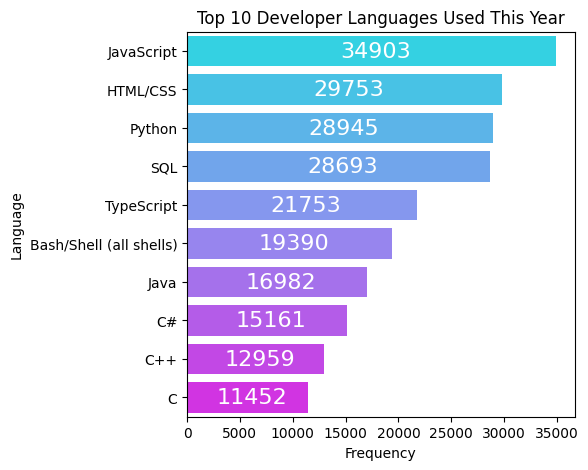

In [58]:
plt.figure(figsize=(5,5))
ax = sns.barplot(x=top10lang.values, y=top10lang.index, palette='cool', hue=top10lang.index)
plt.title('Top 10 Developer Languages Used This Year')
plt.xlabel('Frequency')
plt.ylabel('Language')

for container in ax.containers:
    ax.bar_label(container, label_type='center', color='w', fontsize=16, padding=3)
plt.show()

In [50]:
Languages_des_pop = df.LanguageWantToWorkWith.str.split(';').explode()
top10lang_des = Languages_des_pop.value_counts().head(10)

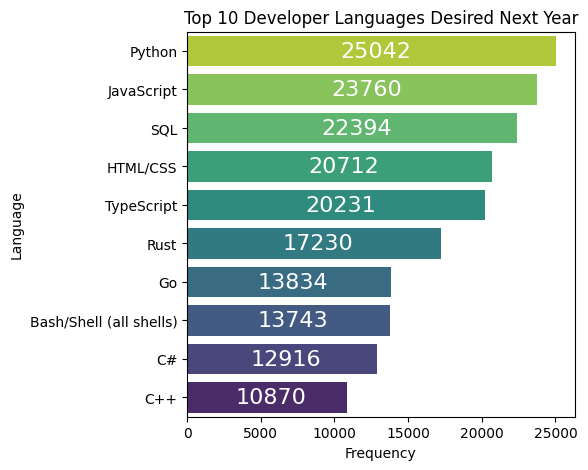

In [59]:
plt.figure(figsize=(5,5))
ax = sns.barplot(x=top10lang_des.values, y=top10lang_des.index, palette='viridis_r', hue=top10lang_des.index)
plt.title('Top 10 Developer Languages Desired Next Year')
plt.xlabel('Frequency')
plt.ylabel('Language')

for container in ax.containers:
    ax.bar_label(container, label_type='center', color='w', fontsize=16, padding=3)
plt.show()

In [62]:
Database_pop = df.DatabaseHaveWorkedWith.str.split(';').explode()
top10data = Database_pop.value_counts().head(10)

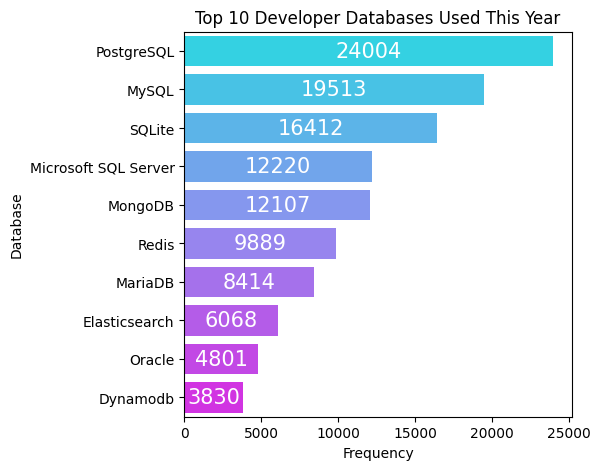

In [63]:
plt.figure(figsize=(5,5))
ax = sns.barplot(x=top10data.values, y=top10data.index, palette='cool', hue=top10data.index)
plt.title('Top 10 Developer Databases Used This Year')
plt.xlabel('Frequency')
plt.ylabel('Database')

for container in ax.containers:
    ax.bar_label(container, label_type='center', color='w', fontsize=15, padding=0)
plt.show()

In [64]:
Database_pop_des = df.DatabaseWantToWorkWith.str.split(';').explode()
top10data_des = Database_pop_des.value_counts().head(10)

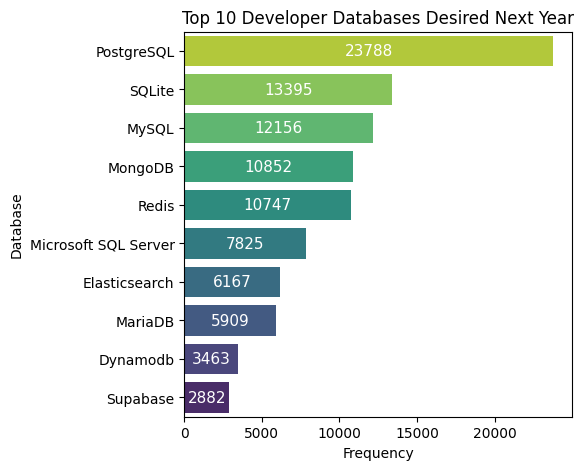

In [65]:
plt.figure(figsize=(5,5))
ax = sns.barplot(x=top10data_des.values, y=top10data_des.index, palette='viridis_r', hue=top10data_des.index)
plt.title('Top 10 Developer Databases Desired Next Year')
plt.xlabel('Frequency')
plt.ylabel('Database')

for container in ax.containers:
    ax.bar_label(container, label_type='center', color='w', fontsize=11, padding=0)
plt.show()

In [68]:
import requests
import json

In [69]:
api_url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/module%201/Accessing%20Data%20Using%20APIs/jobs.json"
response = requests.get(api_url)
if response.ok:
    data = response.json()

In [107]:
from collections import Counter

In [121]:
def count_technologies_in_jobs(source, technologies):
    tech_counter = Counter()

    for listing in source:
        skills = listing.get("Key Skills", "")
        skills_list = [skill.strip() for skill in skills.split("|")]

        for tech in technologies:
            if tech.lower() in [skill.lower() for skill in skills_list]:
                tech_counter[tech] += 1

    df = pd.DataFrame(tech_counter.items(), columns=["Technology", "Number Of Postings"])
    df = df.sort_values(by="Number Of Postings", ascending=False, ignore_index=True)
    
    return df

In [122]:
tech_list = ['C',
'C#',
'C++',
'Java',
'JavaScript',
'Python',
'Scala',
'Oracle',
'SQL Server',
'MySQL Server',
'PostgreSQL',
'MongoDB']

In [123]:
tech_postings = count_technologies_in_jobs(data, tech_list)

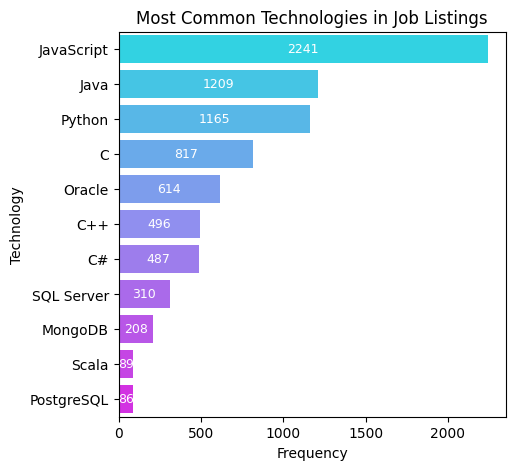

In [124]:
plt.figure(figsize=(5,5))
ax = sns.barplot(data=tech_postings, x='Number Of Postings', y='Technology', palette='cool', hue='Technology')
plt.title('Most Common Technologies in Job Listings')
plt.xlabel('Frequency')
plt.ylabel('Technology')

for container in ax.containers:
    ax.bar_label(container, label_type='center', color='w', fontsize=9, padding=0)
plt.show()

In [157]:
from bs4 import BeautifulSoup
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

In [158]:
table = soup.find('table')

In [159]:
def extract_table(data):
    language_data = []
    salary_data = []
    for row in data.find_all('tr'):
        cols = row.find_all('td')
        language_data.append(cols[1].text)
        salary_data.append(cols[3].text)
    return language_data, salary_data

In [160]:
languages, salaries = extract_table(table)
columns = [languages[0], salaries[0]]
extracted = list(zip(languages[1:], salaries[1:]))

In [161]:
lang_salary = pd.DataFrame(extracted, columns=columns)
lang_salary['Average Annual Salary'] = lang_salary['Average Annual Salary'].replace({'\$': '', ',': ''}, regex=True).astype(int)
lang_salary

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\Stefan\AppData\Local\Temp\ipykernel_22896\681925169.py:2: SyntaxWarning: invalid escape sequence '\$'
  lang_salary['Average Annual Salary'] = lang_salary['Average Annual Salary'].replace({'\$': '', ',': ''}, regex=True).astype(int)


,Language,Average Annual Salary
0,Python,114383
1,Java,101013
2,R,92037
3,Javascript,110981
4,Swift,130801
5,C++,113865
6,C#,88726
7,PHP,84727
8,SQL,84793
9,Go,94082


In [162]:
lang_salary.sort_values(by='Average Annual Salary', ascending=False, inplace=True)

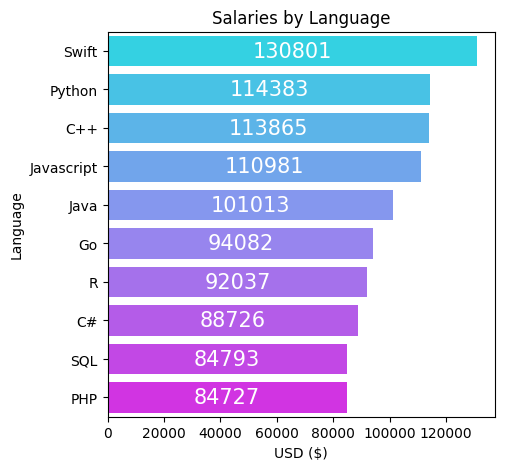

In [163]:
plt.figure(figsize=(5,5))
ax = sns.barplot(x='Average Annual Salary', y='Language', data=lang_salary, palette='cool', hue='Language')
plt.title('Salaries by Language')
plt.xlabel('USD ($)')
plt.ylabel('Language')

for container in ax.containers:
    ax.bar_label(container, label_type='center', color='w', fontsize=15, padding=0)
plt.show()

In [164]:
employment = df.Employment.value_counts().to_frame().head(15)
employment.drop(['Student, full-time;Not employed, but looking for work', 'I prefer not to say'], inplace=True)
employment

,count
Employment,
"Employed, full-time",33264
"Independent contractor, freelancer, or self-employed",4121
"Student, full-time",4009
"Employed, full-time;Independent contractor, freelancer, or self-employed",3140
"Not employed, but looking for work",1971
"Employed, part-time",1017
"Student, full-time;Employed, part-time",991
"Employed, full-time;Student, full-time",777
"Employed, full-time;Student, part-time",738


In [165]:
categories = ['Employed', 'Unemployed', 'Retired']
values = [employment.iloc[[0,1,2,3,5,6,7,8,10,11]].values.sum(), employment.iloc[[4,9]].values.sum(), employment.iloc[12].sum()]

In [166]:
employment_status = pd.DataFrame({'Category': categories, 'Count': values})

In [167]:
colors = ['#00dcff', '#a600ff', '#ff00fb']

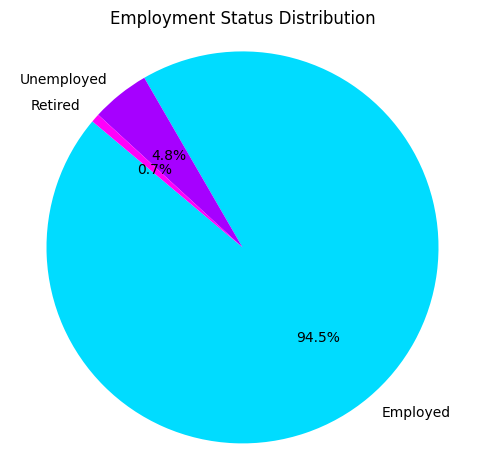

In [178]:
plt.figure(figsize=(6, 5.6))
plt.pie(
    employment_status['Count'],
    labels=employment_status['Category'],
    autopct='%1.1f%%',
    startangle=140,
    colors=colors
)

plt.title('Employment Status Distribution')
plt.axis('equal')
plt.show()